In [1]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

# לולאת `while`

עד כה ראינו כיצד משתמשים בלולאות `for` בפייתון. לולאות `for` משמשות לביצוע בלוק של פקודות **מספר ידוע מראש של פעמים**. לדוגמה, איברי רשימה, תווי מחרוזת או מספרים בטווח נתון. 

**אבל מה קורה אם אנחנו לא יודעים מראש כמה פעמים צריך לחזור על ביצוע בלוק של פקודות?** זה מקרה די נפוץ בתכנות. במקרה כזה אנחנו רוצים להגדיר תנאי מסויים, שלפיו ייקבע האם להמשיך לאיטרציה נוספת או להפסיק את ביצוע הלולאה. לולאות for לא מתאימות לסיטואציה כזאת. 

בשביל זה יש סוג נוסף של לולאות - **לולאות `while`**. המבנה של לולאת `while` הוא כזה:
```python
while condition:
 	statements
```
משמעות המבנה היא שבלוק הפקודות (שנמצא בהזחה) יתבצע כל עוד (while) התנאי שמוגדר בלולאה מתקיים. 

זה מהלך הביצוע המפורט:   
בפעם הראשונה שמגיעים לשורת ה-`while` בתוכנית שלנו, נבדק התנאי. אם התנאי מתקיים (ערכו True), בלוק הפקודות מתבצע, ומייד בסיומו חוזרים ובודקים שוב את התנאי.   
אם הוא שוב מתקיים, חוזרים על ביצוע בלוק הפקודות, וחוזר חלילה.   
בפעם הראשונה שהתנאי לא מתקיים (ערכו `False`), נפסק ביצוע הלולאה, ועוברים לפקודות שבהמשך התוכנית. 

ייתכן שזה יקרה כבר בפעם הראשונה שבודקים את התנאי, ואז בכלל לא נבצע את בלוק הפקודות, אפילו לא פעם אחת. אבל זה גם יכול לקרות אחרי מספר גדול מאוד של איטרציות. כפי שאמרנו, אנחנו לא יודעים מראש, ואין לנו צורך לדעת, כמה איטרציות יבוצעו.

להלן תרשים זרימה שמתאר באופן כללי את אופן פעולתה של לולאת `while`:  
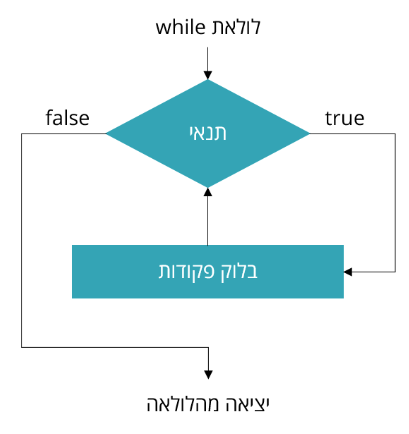

הדוגמאות הראשונות שנביא כאן הן דוגמאות שבהן לא באמת חייבים להשתמש בלולאות while. הסיבה לכך היא שאנחנו רוצים להתחיל עם דוגמאות מוכרות שדומות לדוגמאות קודמות שכבר ראיתם כשלמדתם על לולאות `for`. אחרי שנבין היטב את התחביר והשימוש בלולאות `while`, נפנה גם לדוגמאות בהן הבחירה בלולאות `while` מחוייבת המציאות. 

בואו נתחיל עם דוגמה פשוטה:
```python
n = 0
while n < 10:
    print(n)
    n = n + 1
print("goodbye")
```
בשורה הראשונה של התוכנית, לפני תחילת הלולאה, הוגדר משתנה בשם n והוא אותחל ב-0.   
בשורה השניה נבדק התנאי n<10. התנאי מתקיים, כי הערך של הביטוי 0<10 הוא True. לכן, נכנסים לגוף הלולאה ומבצעים את הפקודות: מדפיסים את ערכו של n (שהוא כרגע 0), ואח"כ מגדילים את n ב-1. 
עכשיו חוזרים ובודקים את התנאי n<10. מכיוון ש 1<10 הוא תנאי אמת, שוב נכנסים לגוף הלולאה ומבצעים את הפקודות שם: מדפיסים את ערכו של n (כרגע הוא 1), ומגדילים את n להיות 2.   
כך נמשך ביצוע הלולאה **כל עוד** התנאי n<10 מתקיים. 

In [2]:
import json
from jupyterquiz import display_quiz

example = '''
[
  {
    "question": "מהו הערך האחרון של ח שהודפס?",
    "type": "numeric",
    "answers": [
      {
        "type": "value",
        "value": 9,
        "correct": true,
        "feedback": "נכון!"
      },
      {
        "type": "default",
        "feedback": "לא נכון. הפעם האחרונה שבה התנאי מתקיים היא כאשר n שווה 9. התנאי 9<10 מתקיים, נכנסים לגוף הלולאה, מדפיסים את 9, ומגדילים את n ל-10. עכשיו בודקים את התנאי 10<10 ותנאי זה הוא False. לכן הלולאה עוצרת, ועוברים להמשך התוכנית, כלומר להדפסת “goodbye“. "
      }
    ]
  }
]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

### לולאות אינסופיות – ראו הוזהרתם!

בלולאות `while` קיים סיכון שעלינו להיות מודעים אליו. בעוד שלולאות `for` נעצרות כאשר הגענו לסוף סדרת הערכים ב-`iterable` שהצבנו, בלולאות `while` **אנחנו אחראים לכך שהלולאה תעצור**, כלומר שבמוקדם או במאוחר התנאי כבר לא יתקיים. לולאה אינסופית תיווצר כאשר נשכח לעדכן את המשתנה הקשור לתנאי הלולאה, או שנגדיר תנאי שלעולם לא ישוערך ל-`False`. 

למשל, בדוגמה הבאה, מה היה קורה אילו בטעות היינו משמיטים את השורה `num = num+1`, כלומר, שוכחים להגדיל את num ב-1 בכל איטרציה של הלולאה? 
```python
def sum_range2(start, end):
    s = 0
    num = start
    while num <= end:
        s = s+num
        num = num+1 ##Accidently this line was dropped
    return s
```

טעות זו מסתברת כבעלת השלכות דרמטיות. מה יקרה למשל אם נריץ כעת:
```python
print(sum_range2(1, 10))
```
הלולאה תמשיך, תאורטית לפחות, לרוץ לנצח! הרי הערך של num לנצח יהיה 1, ולכן התנאי `num<end` יתקיים תמיד. בסרטון הבא נדגים את זה קורה בפועל.

In [3]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/eUuxmC5TEjg?si=QcZbcNxvbatWzslJ" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

להלן מספר קטעי קוד. קבע עבור כל אחד מהם האם הוא יוצר לולאה אינסופית.

```python
# קטע 1
for i in range(10, 20, -1):
    print(i)

# קטע 2
i = 0
while i < 100:
    i = i + 10
    print(i)

# קטע 3
i = 20
while i > 0:
    i = i - 1
    if i < 10:
        i = 20
    print(i)

# קטע 4
for i in range(1, 10):
    print(i)

# קטע 5
i = 0
while i < 100:
    i = i * 10
    print(i)


In [4]:
import json
from jupyterquiz import display_quiz

example = '''
[
  {
    "question": "האם קטע 1 יוצר לולאה אינסופית?",
    "type": "many_choice",
    "answers": [
      { "answer": "כן", "correct": false, "feedback": "לא נכון" },
      { "answer": "לא", "correct": true, "feedback": "נכון!" }
    ]
  },
  {
    "question": "האם קטע 2 יוצר לולאה אינסופית?",
    "type": "many_choice",
    "answers": [
      { "answer": "כן", "correct": false, "feedback": "לא נכון" },
      { "answer": "לא", "correct": true, "feedback": "נכון!" }
    ]
  },
  {
    "question": "האם קטע 3 יוצר לולאה אינסופית?",
    "type": "many_choice",
    "answers": [
      { "answer": "כן", "correct": true, "feedback": "נכון!" },
      { "answer": "לא", "correct": false, "feedback": "לא נכון" }
    ]
  },
  {
    "question": "האם קטע 4 יוצר לולאה אינסופית?",
    "type": "many_choice",
    "answers": [
      { "answer": "כן", "correct": false, "feedback": "לא נכון" },
      { "answer": "לא", "correct": true, "feedback": "נכון!" }
    ]
  },
  {
    "question": "האם קטע 5 יוצר לולאה אינסופית?",
    "type": "many_choice",
    "answers": [
      { "answer": "כן", "correct": true, "feedback": "נכון!" },
      { "answer": "לא", "correct": false, "feedback": "לא נכון" }
    ]
  }
]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

### מימוש באמצעות לולאת `while` לעומת `for`

הריצו את התוכנית בחלונית וצפו בהדפסות:

In [5]:
# Simple while loop
n = 0
while n < 10:
    print(n)
    n = n + 1
print('goodbye')

0
1
2
3
4
5
6
7
8
9
goodbye


אולי שמתם לב שבדוגמה הזו בעצם מספר האיטרציות כן היה ידוע מראש. אם n מאותחל ל-0, ברור שיבוצעו 10 איטרציות, אחת עבור כל מספר שלם בין 0 ל-9 (כולל). לכל ערך שלם התחלתי של n קל לומר מראש כמה איטרציות יבוצעו. ובאמת, היינו יכולים להשתמש פה בלולאת `for`:

In [6]:
for n in range(10):
    print(n)
print("goodbye")

0
1
2
3
4
5
6
7
8
9
goodbye


לולאת `for` נראית אפילו פשוטה יותר במקרה הזה. המסקנה מהדוגמה הזו היא שכל מה שאפשר לעשות עם לולאות `for` אפשר גם לעשות עם לולאות `while`. אבל ההיפך לא נכון. בהמשך נדגים מצבים שבהם באמת אין מנוס משימוש בלולאות while, כי אין דרך לדעת את מספר האיטרציות מראש.

### דוגמא לשימוש הכרחי בלולאת `while` - הטלת קוביה

כל הדוגמאות שראיתם עד כה לא באמת הצריכו לולאות `while`, אבל הן היו חשובות כדי להבין את התחביר של לולאות מסוג זה. הדוגמה שניראה כעת שונה – בדוגמה זו חייבים להשתמש בלולאות `while`.

מתי בפעם האחרונה הטלתם קוביה? הטלת קוביה או מטבע היא שיטה פשוטה לבחור תוצאה מסויימת באופן אקראי. למשל, אם אתם צריכים להחליט מי יפנה את האשפה, אתם או אחיכם הקטן, אפשר להטיל מטבע כאשר כל צד במטבע מייצג תוצאה אפשרית. אם המטבע הוגן (הסיכוי שלו ליפול על כל צד זהה), וההטלה הוגנת (לא מנסים לגרום למטבע ליפול על איזשהו צד במכוון), התוצאה תהיה אקראית. אי אפשר לדעת מראש על איזה צד ייפול המטבע, ואם נטיל אותו פעמים רבות, נצפה שהוא ייפול על כל אחד מהצדדים שלו מספר דומה של פעמים (אם כי לא מובטח, ואף לא סביר, שהמספרים יהיו ממש זהים). הטלת קוביה עם 6 פאות דומה בכך שגם היא מספקת תוצאה אקראית, אלא שכאן יש 6 תוצאות אפשריות ולא 2. 

איך זה קשור לענייננו – לולאות `while`? נניח שאנחנו רוצים להטיל קוביה מספר פעמים, ולספור את כמות ההטלות עד שמתקבלת התוצאה 6. בהנחה שהקוביה הוגנת במובן שהוזכר קודם, אין לנו דרך לדעת מראש כמה הטלות כאלו יידרשו. מעבר לכך, בכל "ניסוי" כזה מספר ההטלות עשוי בהחלט להשתנות. פעם אחת נקבל 6 מיד בהטלה הראשונה, ופעם רק בהטלה העשירית. ייתכן גם, אם כי מאוד לא סביר, שנקבל 6 רק אחרי 1000 הטלות. אבל הנקודה היא שמאחר שמספר האיטרציות כאן לא יכול להיות ידוע מראש, אם נרצה לכתוב תוכנית בפייתון שתדמה הטלת קוביה, נצטרך להשתמש בלולאות. **בסרטון הבא נכתוב יחד תכנית זו.**

```{admonition} **שימו לב!**  
:class: error

בסרטון הבא יהיה שימוש בפונקציה בשם `random.choice` אשר מקבלת רשימה ומחזירה כל פעם איבר אקראי (רנדומלי) מהרשימה. על מנת להשתמש בה, יש לכתוב בראש הפונקציה הקוד `import random`. בשלב זה בקורס, לא נדרש להבין מה פקודת ה`import` עושה.
```

In [7]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/qhtRPba6BjE?si=1rnoInDsS36z6do9" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

**לנוחיותכם חלונית עם הקוד שראינו בסרטון. מוזמנים להריץ בעצמכם:**

In [8]:
import random

def count_rolls_until_6():
    res = random.choice([1, 2, 3, 4, 5, 6])
    print(res)
    count_rolls = 1
    while res != 6:
        res = random.choice([1, 2, 3, 4, 5, 6])
        print(res)
        count_rolls = count_rolls + 1

    return count_rolls


rolls = count_rolls_until_6()
print(rolls, "rolls were needed to get 6 in a fair dice experiment")

4
4
1
1
4
4
3
3
3
5
5
6
12 rolls were needed to get 6 in a fair dice experiment


### תרגול

בחלונית הקוד שלפניכם מופיעה הפונקציה `count_rolls_until_6` אותה הצגנו בסרטון, אך בשינוי קל - הפעם הפונקציה מקבלת כקלט פרמטר אחד בשם n (שאנו נניח כי הוא מספר שלם חיובי).

עליכם לשנות את הפונקציה כך שהיא תחזיר את מספר ההטלות שנדרשו עד שהמספר 6 התקבל n פעמים (למשל: עבור n = 3 הפונקציה תחזיר כמה הטלות נדרשו בהרצה הנוכחית עד שקיבלנו 3 פעמים את המספר 6).

הנחיות:

- המבנה הכללי של הפונקציה נשאר דומה - יש לבצע "הטלה" ראשונה של הקוביה, ולאחר מכן, בתוך לולאת `while`, לבצע הגרלות נוספות לפי הצורך. אז מה כן שונה? בעיקר התנאי של הלולאה - עליכם להוסיף מונה נוסף (תנו לו שם כרצונכם) שיהיה אחראי על ספירת ההטלות בהן קיבלנו 6 (שימו לב - זהו מונה שונה מ-`count_rolls`, שסופר את מספר ההטלות הכולל, ואת ערכו יש להחזיר בסוף הפונקציה). חישבו היכן וכיצד לאתחל מונה זה. הלולאה תרוץ כל עוד ערכו של מונה זה קטן מ-n.
- מה קורה בתוך הלולאה? כמו קודם, מגרילים מספר חדש. אם התוצאה היא 6 - הגדילו את ערכו של המונה החדש ב-1. ובכל מקרה - בין אם התוצאה היא 6 ובין אם לא - הגדילו את המונה `count_rolls`. - לאחר שיוצאים מהלולאה, כלומר, כאשר קיבלנו 6 n פעמים, מחזירים את מספר ההטלות הכולל.

לאחר שסיימתם לכתוב את הקוד, שנו את המשתנה n שמופיע מתחת לפונקציה למספר חיובי ושלם כרצונכם (זהו הקלט של הפונקציה), הריצו את הקוד, ובדקו לפי תוצאות ההטלות (המודפסות למסך) אם הקוד שלכם עובד (אין צורך לכתוב את הקריאה לפונקציה, עשינו זאת עבורכם).

In [9]:
import random

# Modify this function:
def count_rolls_until_6(n):
    res = random.choice([1, 2, 3, 4, 5, 6])
    print(res)
    count_rolls = 1
    while res != 6:
        res = random.choice([1, 2, 3, 4, 5, 6])
        print(res)
        count_rolls = count_rolls + 1

    return count_rolls


n = 1
rolls = count_rolls_until_6(n)
print(rolls, "rolls were needed to get", n,"times 6 in a fair dice experiment")

1
6
2 rolls were needed to get 1 times 6 in a fair dice experiment
